# Feature Selection

Dans ce notebook, nous allons tester différentes **méthodes de sélection de variables**. En apprentissage supervisé,cette étape cruciale permet d'améliorer les performances des modèles prédictifs, en excluant les variables non significatives ou redondantes.

Ces méthodes se déclinent en 3 familles :
- **Filter** methods
- **Wrapped** methods
- **Embedded** methods 

Nous allons étudier les méthodes les plus largement utilisées en ML. Nous allons appliquer ces méthodes au dataset **Breast Cancer Winconsin** puis comparer les performances des modèles obtenues.

Pour rappel, ce dataset contient les informations suivantes (*source Kaggle*):

1. ID number
2. Diagnosis (M = malignant, B = benign)
3. 32 Ten real-valued features are computed for each cell nucleus:

       a) radius (mean of distances from center to points on the perimeter)
       b) texture (standard deviation of gray-scale values)
       c) perimeter
       d) area
       e) smoothness (local variation in radius lengths)
       f) compactness (perimeter^2 / area - 1.0)
       g) concavity (severity of concave portions of the contour)
       h) concave points (number of concave portions of the contour)
       i) symmetry
       j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.




## 1. Chargement et description des données

- Charger les données
- Afficher les dimensions et les premières lignes du DataFrame

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
data_Selection=pd.read_csv('Breast Cancer.csv', sep=',', encoding='utf8')

In [78]:
data_Selection.shape

(569, 33)

In [3]:
print('Les colonnes de data sont',data_Selection.columns)

Les colonnes de data sont Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [106]:
data_Selection= pd.read_csv('Breast Cancer.csv')
data_Selection.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [105]:
data_Selection.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


In [18]:
data_Selection.shape

(569, 33)

## 2. Data Analysis et preprocessing

1. Analyser les missing values et les distributions marginales des features

In [79]:
data_Selection.isnull().sum()
data_Selection.isna().sum()
data_Selection.drop(data_Selection.columns[[-1, 0]], axis=1, inplace=True)
data_Selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

In [82]:
diagnosis_all = list(data_Selection.shape)[0]
diagnosis_categories = list(data_Selection['diagnosis'].value_counts())

print("\n \t The data has {} diagnosis, {} malignant and {} benign.".format(diagnosis_all, 
                                                                                 diagnosis_categories[0], 
                                                                                 diagnosis_categories[1]))

for col in data_Selection.columns: 
    print(col)


 	 The data has 569 diagnosis, 357 malignant and 212 benign.
diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:933: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\ma\core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


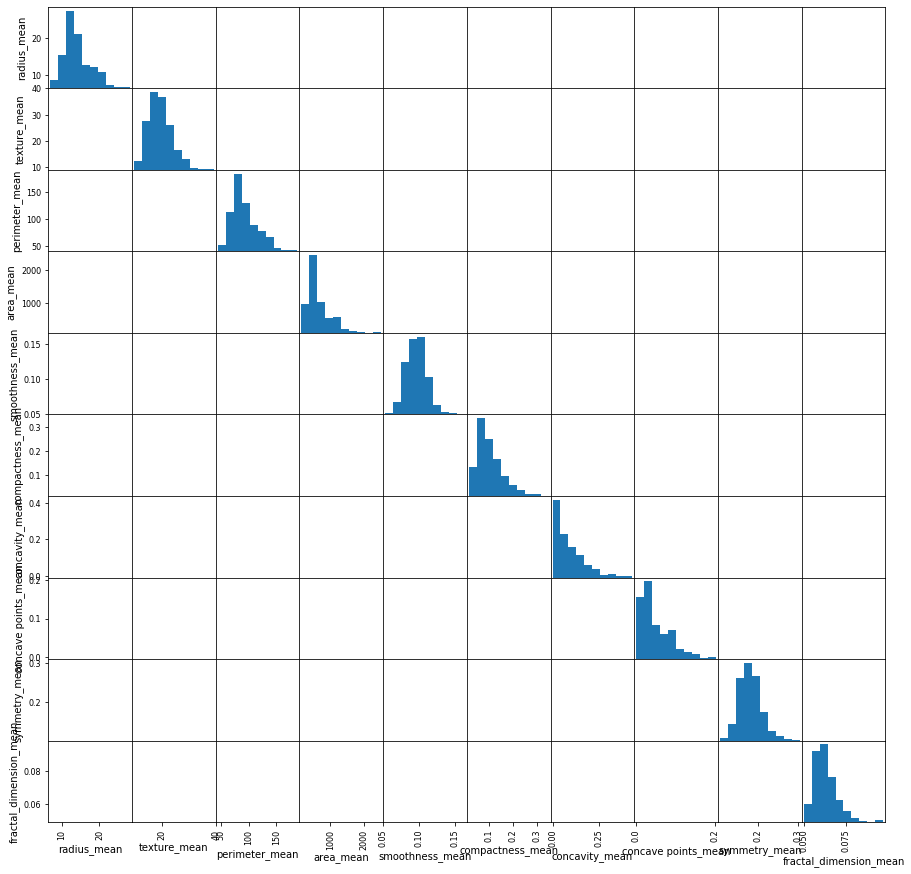

In [85]:
from pandas.plotting import scatter_matrix
#marginal distribution
features_mean= list(data_Selection.columns[1:11])

color_dic = {'M':'red', 'B':'blue'}
colors = data_Selection['diagnosis'].map(lambda x: color_dic.get(x))

sm = scatter_matrix(data_Selection[features_mean], c=colors, alpha=0.4, figsize=((15,15)));

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


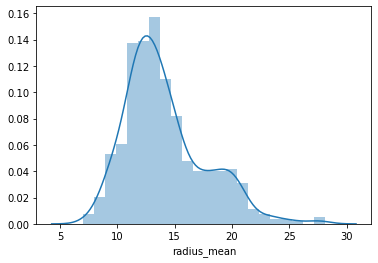

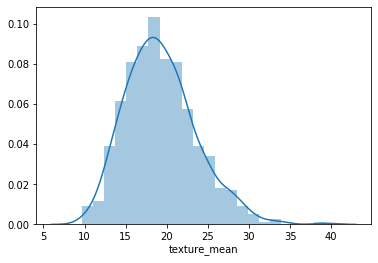

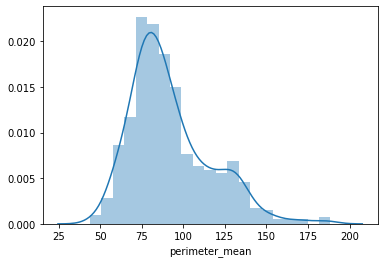

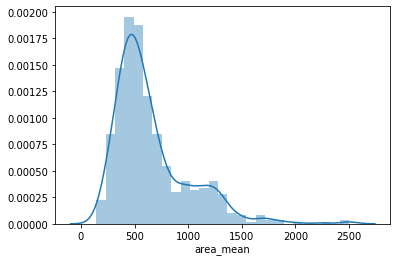

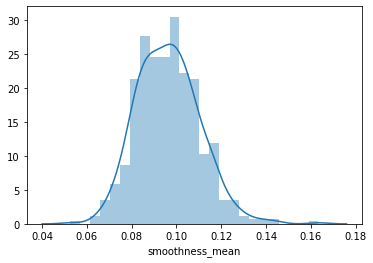

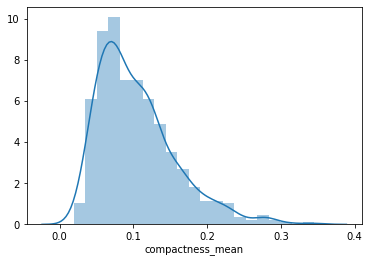

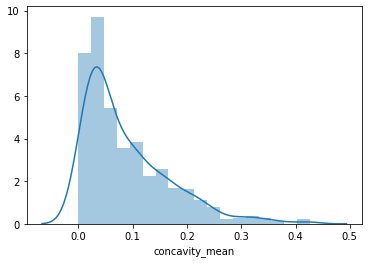

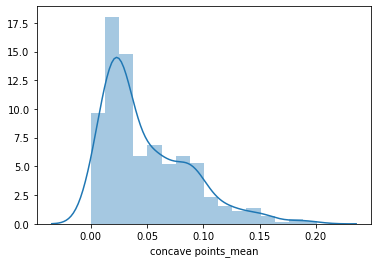

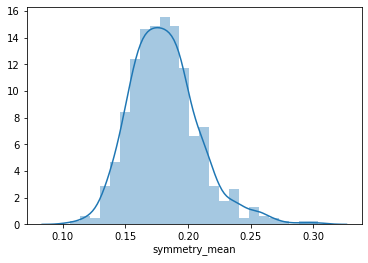

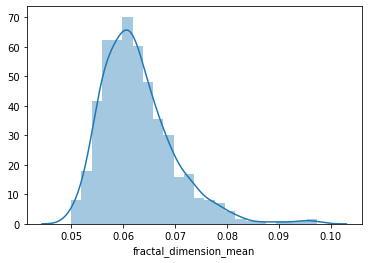

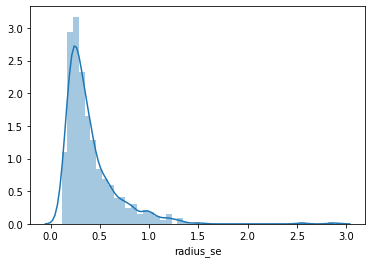

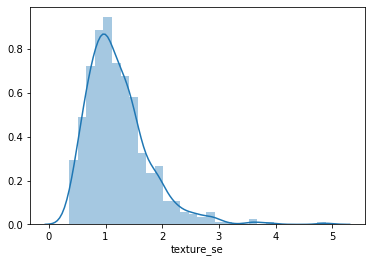

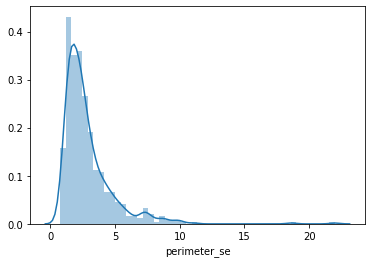

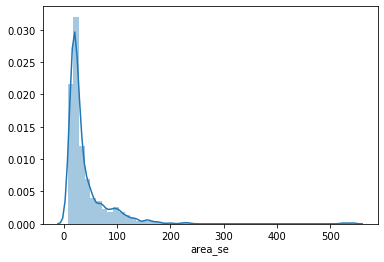

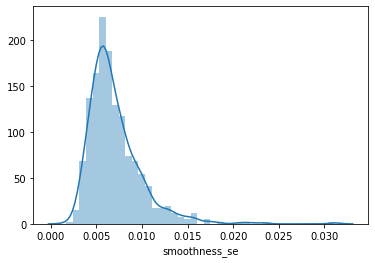

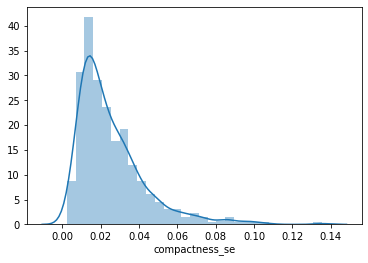

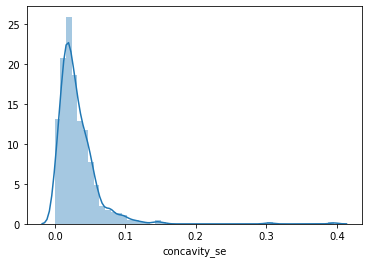

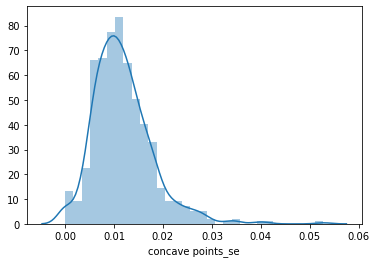

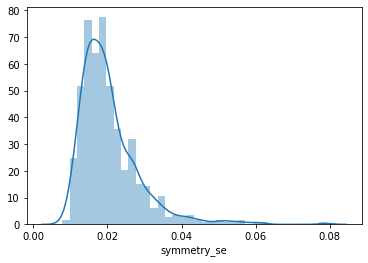

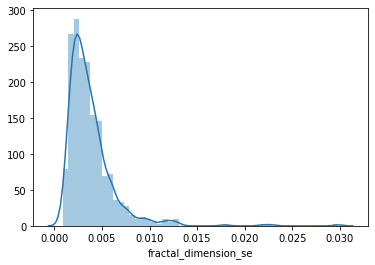

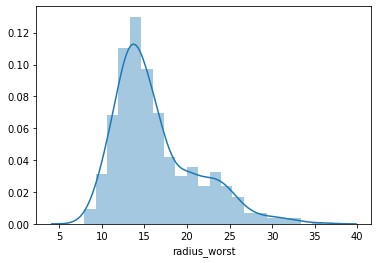

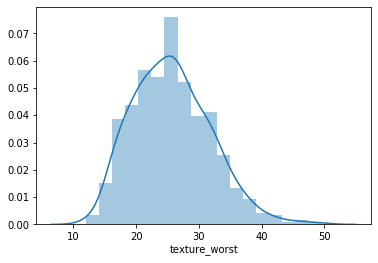

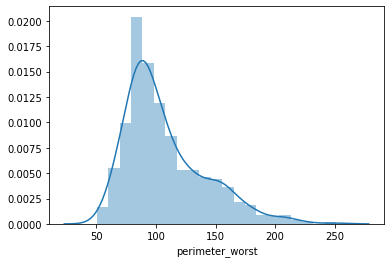

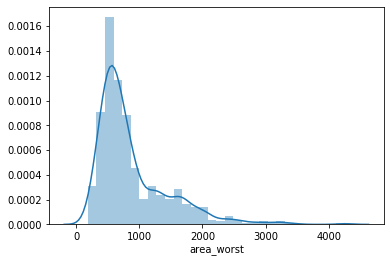

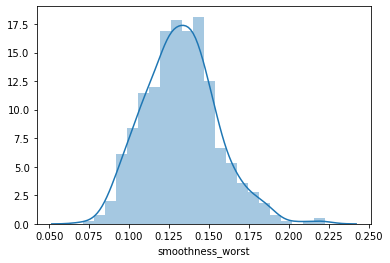

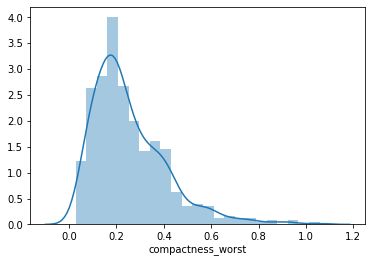

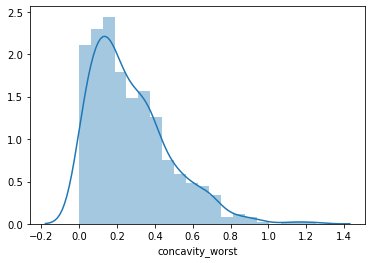

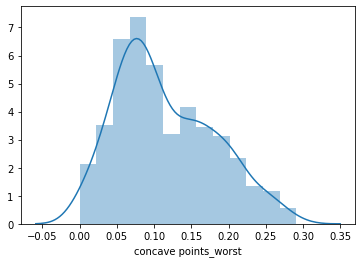

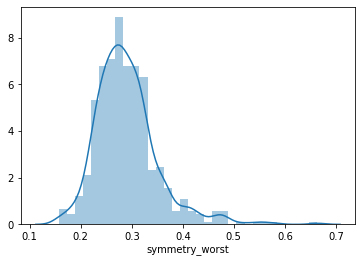

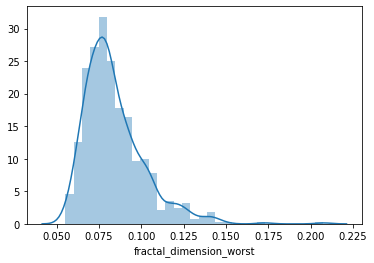

In [22]:
target = data_Selection.iloc[:,1]
features = data_Selection.iloc[:,2:-1]
features.columns
for var in features.columns:
    plt.figure()
    sns.distplot(features[var])

2. Analyser la matrice de corrélation des features.Noter les corrélations supérieures à 0.9

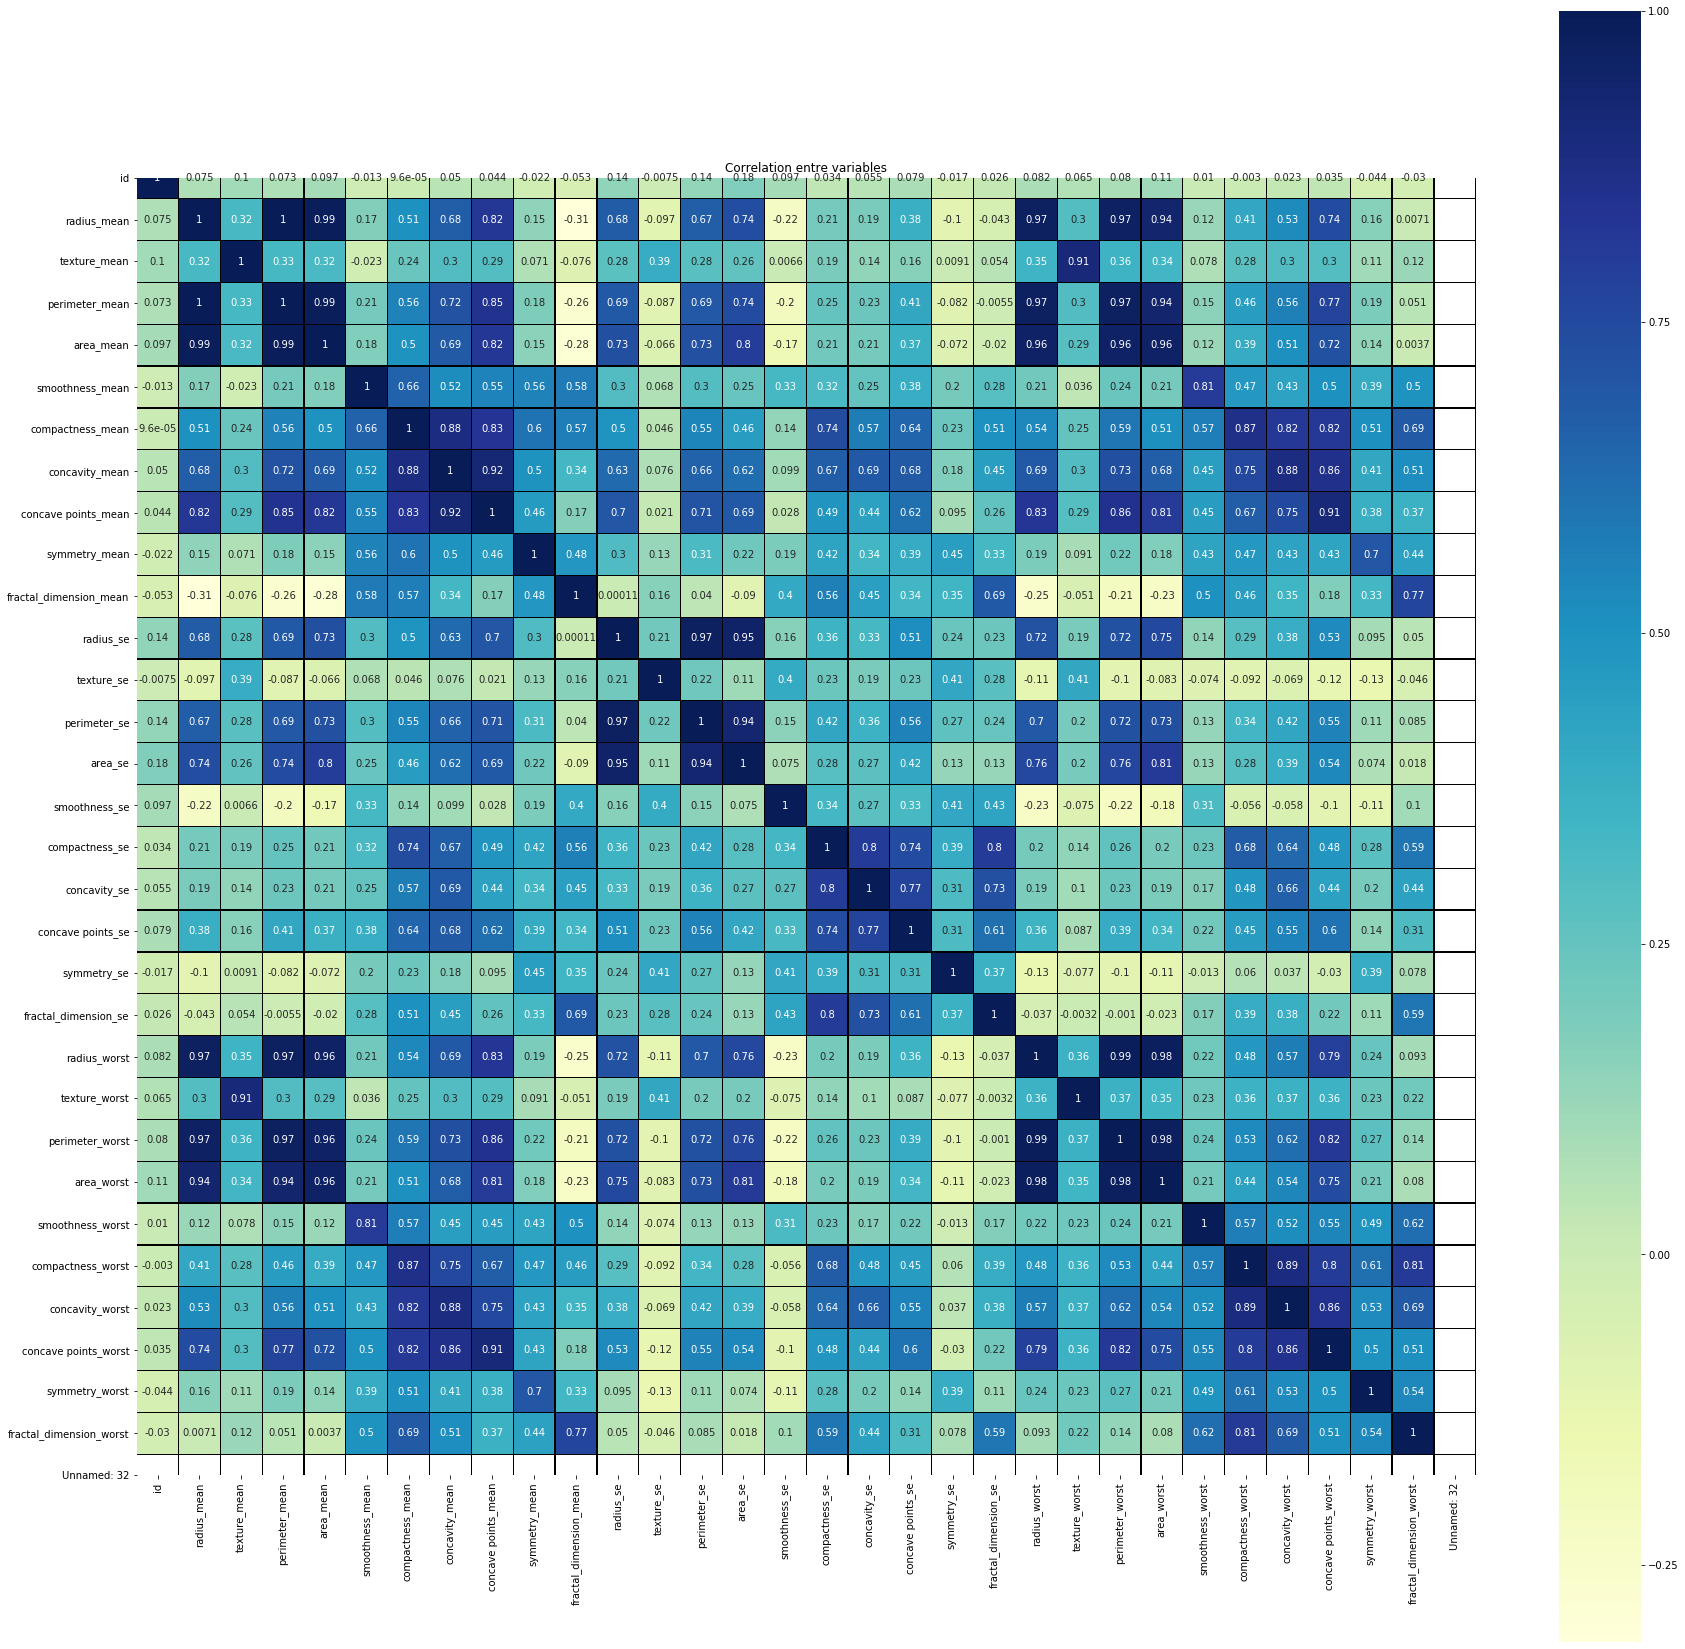

In [9]:
f, ax = plt.subplots(figsize=(30, 30))
plt.title('Correlation entre variables')
sns.heatmap(data_Selection.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

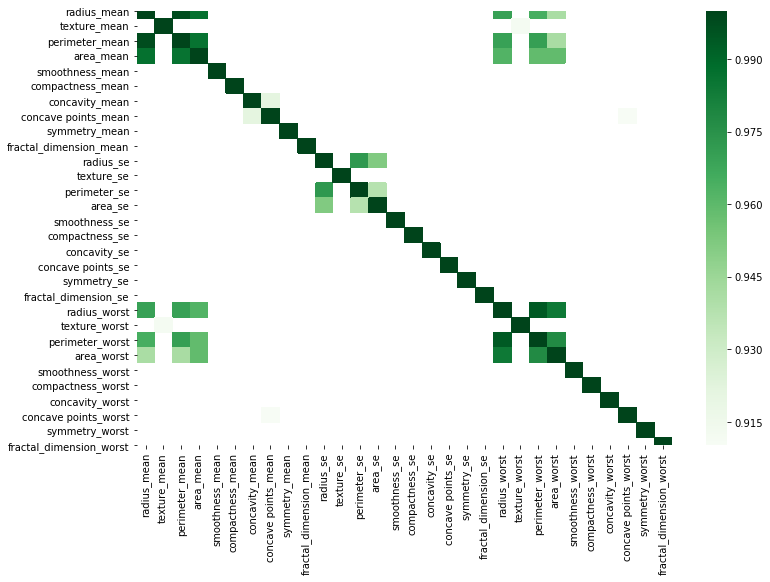

In [23]:
corr = features.corr()
kot = corr[corr>=0.9]
plt.figure(figsize = (12,8))
sns.heatmap(kot,cmap="Greens")

sup a 0,9 : 
radius_mean/area_mean; radius_mean/perimeter_mean;radius_mean/radius_worst; radius_mean/perimeter_worst;radius_mean/area_worst
texture_mean/texture_worst;perimeter_mean/radius_worst;perimeter_mean/area_mean; perimeter_mean/perimeter_worst;perimeter_mean/area_worst;aeara_mean/aera_worst;aera_mean/perimeter_worst;aera_mean/radius_worst;aera_se/perimeter_se;aera_se/radius_se;radius_se/perimeter_se
concave points_mean/concave points_worst.

3. Analyser les distributions conditionnelles (à la target) des features. 

**Bonus :** Utiliser la statistique de Kolmogorov-Smirnov (`scipy.stats`) pour comparer les distributions.

On décide de supprimer à ce stade les features suivants: 
'perimeter_mean','radius_mean','texture_worst','area_worst','perimeter_worst','radius_worst'

In [ ]:
La distribution conditionnelle d'une variable X selon chaque modalité de la variable 
Y donne la répartition des modalités de la variable X dans chacune des sous-populations
constituées des modalités de la variable Y.
La distribution marginale donne la répartition des individus selon les modalité 
d'une variable, sans considérer les modalités de l'autre variable. Par exemple,
les fréquences marginales de X correspondent
aux fréquences des individus présentant la modalité xix_ixi​x, start subscript,
i, end subscript (indépendamment des modalités yjy_jyj​y, start subscript,
j, end subscript).

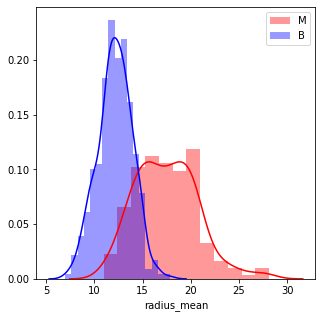

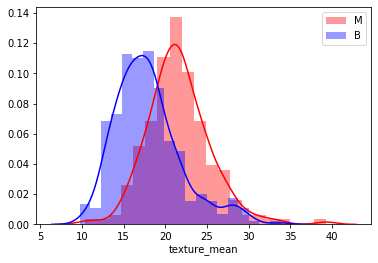

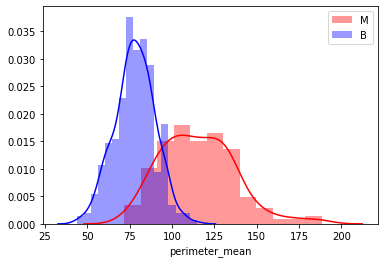

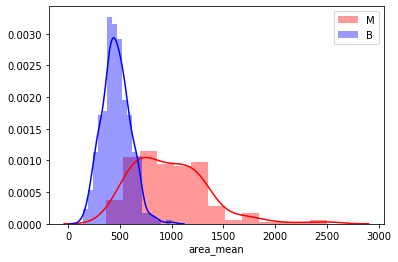

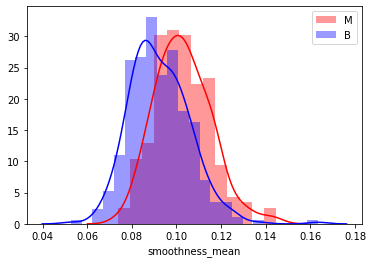

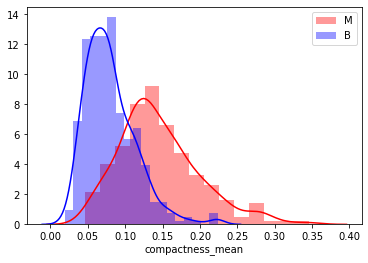

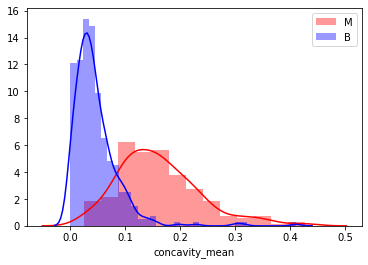

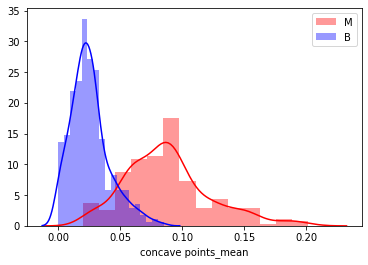

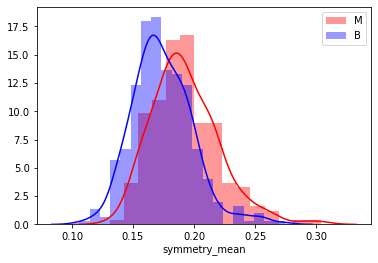

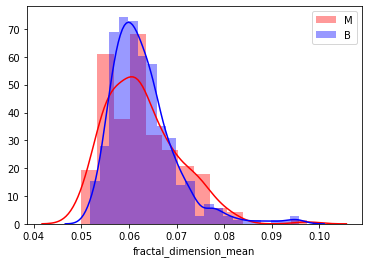

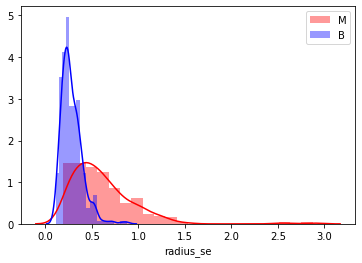

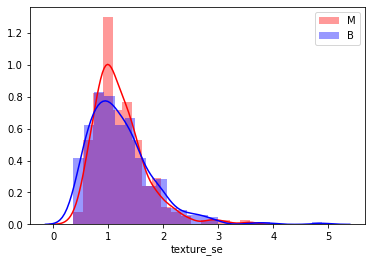

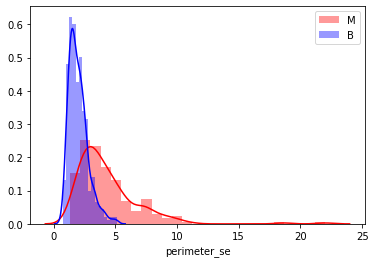

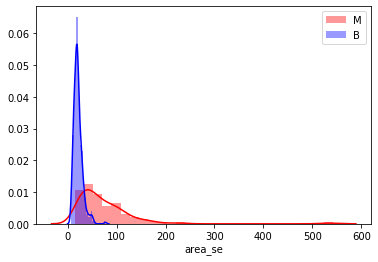

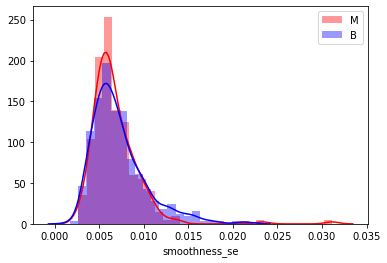

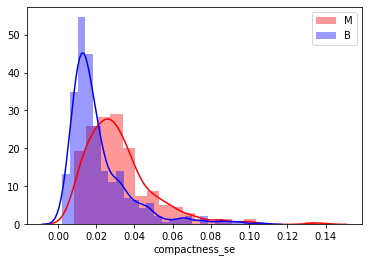

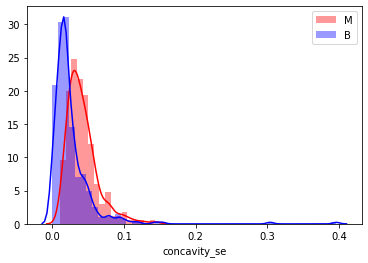

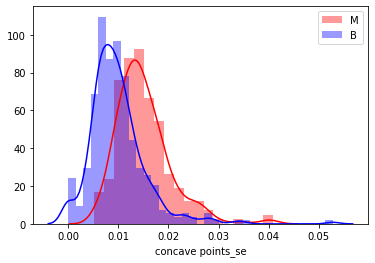

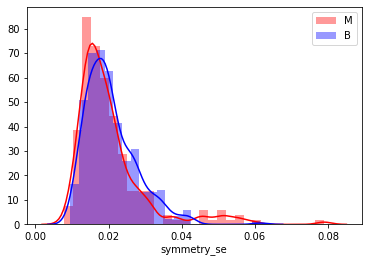

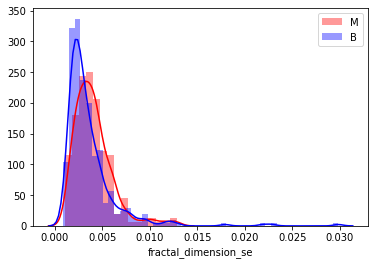

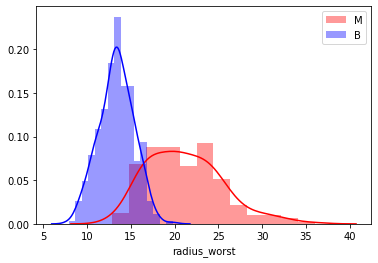

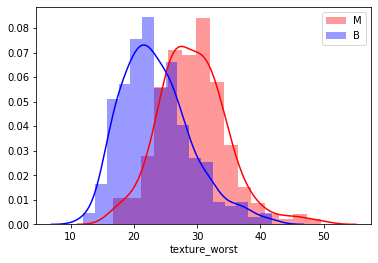

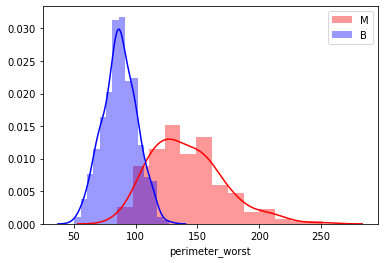

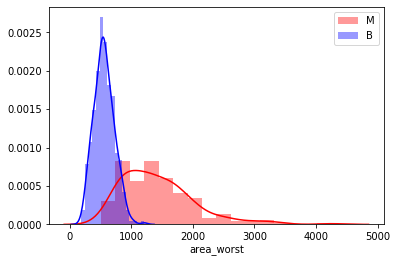

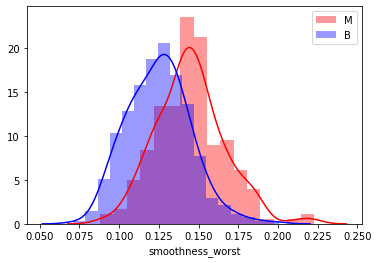

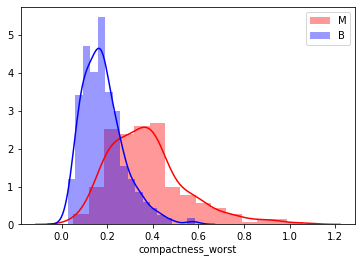

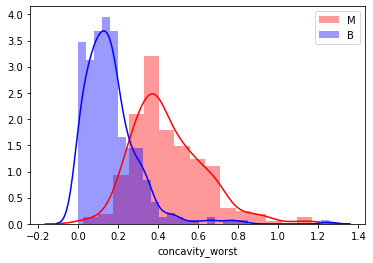

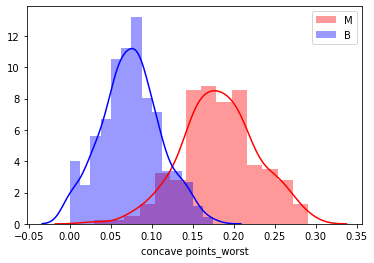

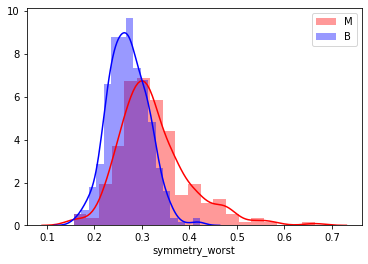

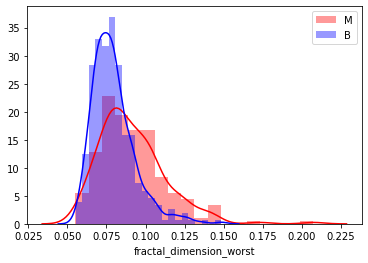

In [27]:
bins = 12
plt.figure(figsize=(5,5))
for i, feature in enumerate(features):
    rows = int(len(features)/2)
    
   # plt.subplot(rows, 2, i+1)
    
    sns.distplot(data_Selection[data_Selection['diagnosis']=='M'][feature], color='red', label='M');
    sns.distplot(data_Selection[data_Selection['diagnosis']=='B'][feature],color='blue', label='B');
    plt.legend(loc='upper right')
    plt.show()

In [86]:
data_Selection1 = data_Selection
data_Selection2 = data_Selection1.drop(['diagnosis', 'perimeter_mean','radius_mean','texture_worst','area_worst','perimeter_worst','radius_worst'], axis=1)
data_Selection2.columns

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

4. Standardiser les données numériques et modifier le format de la Target

In [87]:
from sklearn.preprocessing import StandardScaler

In [107]:
#correction
from sklearn import preprocessing

for col in data_Selection2.columns:
        data_Selection2[col] = preprocessing.scale(data_Selection2[col])

In [108]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import time
diag_map = {'M':1, 'B':0}
data_Selection['diagnosis'] = data_Selection['diagnosis'].map(diag_map)

data_Selection['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

5. Splitter les données en bases training et test

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state= 1, stratify = y)


## 3. Feature Selection

### 3.1 Filter methods

1. Expliquer le principe de ces méthodes. Donner des exemples de méthodes

In [62]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [63]:
help(SelectKBest)

Help on class SelectKBest in module sklearn.feature_selection.univariate_selection:

class SelectKBest(_BaseFilter)
 |  SelectKBest(score_func=<function f_classif at 0x000001FE5A2A3B88>, k=10)
 |  
 |  Select features according to the k highest scores.
 |  
 |  Read more in the :ref:`User Guide <univariate_feature_selection>`.
 |  
 |  Parameters
 |  ----------
 |  score_func : callable
 |      Function taking two arrays X and y, and returning a pair of arrays
 |      (scores, pvalues) or a single array with scores.
 |      Default is f_classif (see below "See also"). The default function only
 |      works with classification tasks.
 |  
 |  k : int or "all", optional, default=10
 |      Number of top features to select.
 |      The "all" option bypasses selection, for use in a parameter search.
 |  
 |  Attributes
 |  ----------
 |  scores_ : array-like, shape=(n_features,)
 |      Scores of features.
 |  
 |  pvalues_ : array-like, shape=(n_features,)
 |      p-values of feature sco

2. On souhaite appliquer la fonction `SelectKBest` de la librairie `sklearn.feature_selection` pour définir un premier subset de features.
   Afficher la DocString de cette fonction. 
   Créer l'instance suivante : `SelectKBest(f_classif, k=10)`
   Fitter sur la base de Training
   Stocker les 10 Best features dans une liste
   
   **Bonus** : Analyser la matrice de corrélations et détecter les features fortement corrélées entre elles (seuil fixé à 0.9)
   

In [70]:
from sklearn.feature_selection import SelectKBest as  SKBeast
from sklearn.feature_selection import f_classif

In [65]:
help(SelectKBest)

Help on class SelectKBest in module sklearn.feature_selection.univariate_selection:

class SelectKBest(_BaseFilter)
 |  SelectKBest(score_func=<function f_classif at 0x000001FE5A2A3B88>, k=10)
 |  
 |  Select features according to the k highest scores.
 |  
 |  Read more in the :ref:`User Guide <univariate_feature_selection>`.
 |  
 |  Parameters
 |  ----------
 |  score_func : callable
 |      Function taking two arrays X and y, and returning a pair of arrays
 |      (scores, pvalues) or a single array with scores.
 |      Default is f_classif (see below "See also"). The default function only
 |      works with classification tasks.
 |  
 |  k : int or "all", optional, default=10
 |      Number of top features to select.
 |      The "all" option bypasses selection, for use in a parameter search.
 |  
 |  Attributes
 |  ----------
 |  scores_ : array-like, shape=(n_features,)
 |      Scores of features.
 |  
 |  pvalues_ : array-like, shape=(n_features,)
 |      p-values of feature sco

### 3.2 Wrapper methods

1. Expliquer le principe de ces méthodes. Donner des exemples de méthodes

2. On souhaite appliquer la fonction `SequentialFeatureSelector` de la librairie `mlxtend.feature_selection`pour faire de la sélection `Forward`et `Backward` des features avec la Régression Logistique

   Afficher la DocString de cette fonction. 
   Créer les instances suivantes (**à adapter selon la méthode Forward ou Backward - forward = TRUE ou FALSE**): 
           SequentialFeatureSelector(LogisticRegression(), 
           k_features=10, 
           forward =, 
           floating=False, 
           verbose=2,
           scoring='recall',
           cv=3)
   Fitter sur la base de Training
   Stocker les Best Features dans des listes
   

In [101]:
pip install mlxtend 

Note: you may need to restart the kernel to use updated packages.


In [111]:
from mlxtend.feature_selection import  SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

In [112]:
   
sfs = SFS(LogisticRegression(), 
          k_features=10, 
          forward= True, 
          floating=False,
          verbose= 2,
          scoring='recall',
          cv=3)
sfs = sfs.fit(X_train,y_train)
sfs
best = list(sfs.k_feature_names_[1:10])
best

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation sco

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

3. On souhaite appliquer la fonction `RFE` de la librairie `sklearn.feature_selection` pour faire de la `Recursive Feature Elimination`de features avec la Régression Logistique

   Afficher la DocString de cette fonction. 
   Créer l'instance suivante: 
           RFE(estimator=LogisticRegression(), n_features_to_select=10, step=1)
   Fitter sur la base de Training
   Stocker les Best Features dans une liste
   
   **Bonus** : Relancer la fonction RFE avec Cross_Validation (3 Folds)


In [30]:
###3.3 Embedded methods

1. Expliquer le principe de ces méthodes. Donner des exemples de méthodes

 On souhaite appliquer la fonction `SelectFromModel` de la librairie `mlxtend.feature_selection` pour sélectionner les features les plus importantes avec le **ExtraTreesClassifier**

   Afficher la DocString de cette fonction. 
   
   Créer l'instance suivante :
         SelectFromModel(ExtraTreesClassifier(n_estimators=100)
          
   Fitter sur la base de Training
   Stocker les Best Features dans une liste


## 4. Modeling et Validation

Appliquer la régression Logistique et Evaluer les performances des modèles (Accuracy, Recall, Precision, AUC) selon les scenarii suivants :

1. Sur l'ensemble des features (sans selection)
2. Sur les subsets de features définis aux différentes étapes
3. Avec régularisation LASSO (sur l'ensemble des features)